# Machine Learning for Regression

In [1]:
import os

import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

## 2.1 Prepare Dataset

In [2]:
CAR_DATASET = "./dataset/car_dataset.csv"
car_df = pd.read_csv(CAR_DATASET)

In [3]:
car_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
# Chamge column names 
car_df.columns = car_df.columns.str.lower().str.replace(" ", "_")

In [7]:
car_df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [11]:
print(len(car_df.columns))

16


In [8]:
# Get all the columns containing strings
str_columns = list(car_df.dtypes[car_df.dtypes == "object"].index)
print(str_columns)

['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']


In [9]:
for col in str_columns:
    car_df[col] = car_df[col].str.lower().str.replace(" ", "_")

In [10]:
car_df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## 2.2 Exploratory Data Analysis

In [14]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [15]:
car_df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [16]:
# Check unique values in each column
for col in car_df.columns:
    print(f"Column Name: '{col}'")
    print(f"First five unique values: {car_df[col].unique()[:5]}")
    print(f"Number of unique values: {car_df[col].nunique()}")
    print("\n----------------------\n")

Column Name: 'make'
First five unique values: ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
Number of unique values: 48

----------------------

Column Name: 'model'
First five unique values: ['1_series_m' '1_series' '100' '124_spider' '190-class']
Number of unique values: 914

----------------------

Column Name: 'year'
First five unique values: [2011 2012 2013 1992 1993]
Number of unique values: 28

----------------------

Column Name: 'engine_fuel_type'
First five unique values: ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
Number of unique values: 10

----------------------

Column Name: 'engine_hp'
First five unique values: [335. 300. 230. 320. 172.]
Number of unique values: 356

----------------------

Column Name: 'engine_cylinders'
First five unique values: [ 6.  4.  5.  8. 12.]
Number of unique values: 9

----------------------

Column Name: 'transmission_type'
First five unique values: ['manual' 'au

Distribution of price

c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\machine-learning-zoomcamp-23-gSc8i9dl-py3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\machine-learning-zoomcamp-23-gSc8i9dl-py3.9\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

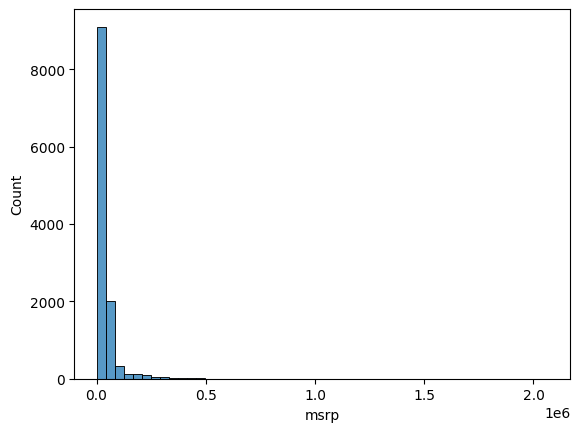

In [19]:
sns.histplot(car_df.msrp, bins=50)

- The resulting distribution is called a long-tail distribution

- Long tail distribution is not good for machine learning as it might skew the model.

- We can solve this using logarithm to transform the column.

c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\machine-learning-zoomcamp-23-gSc8i9dl-py3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\machine-learning-zoomcamp-23-gSc8i9dl-py3.9\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

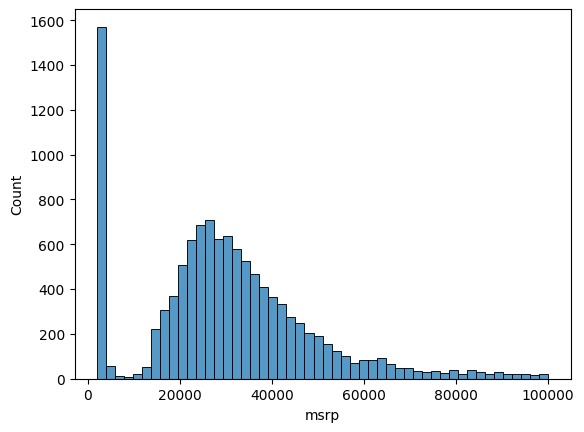

In [18]:
sns.histplot(car_df.msrp[car_df.msrp < 100000], bins=50)

In [20]:
price_logs = np.log1p(car_df.msrp)

c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\machine-learning-zoomcamp-23-gSc8i9dl-py3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\machine-learning-zoomcamp-23-gSc8i9dl-py3.9\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

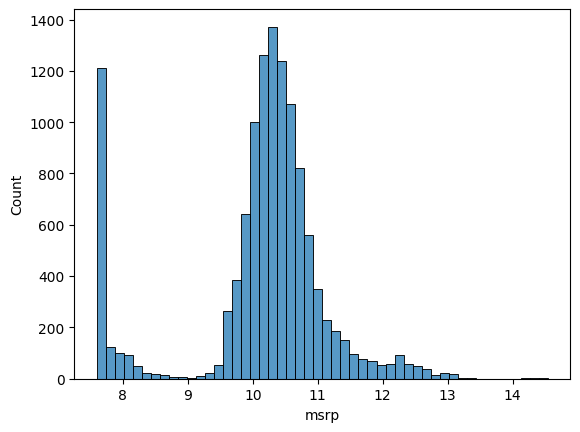

In [21]:
sns.histplot(price_logs, bins=50)

Normal distribution is ideal for machine learning models

### Dealing with missing values

In [22]:
car_df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.3 Setting up The Validation Framework

- Splitting the dataset into train, test, and validation sets.

In [23]:
n = len(car_df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test 

In [24]:
n_val, n_test, n_train 

(2382, 2382, 7150)

In [25]:
car_df_val = car_df.iloc[:n_val]
car_df_test = car_df.iloc[n_val:n_val+n_test]
car_df_train = car_df.iloc[n_val+n_test:]

print(f"Shape of validation dataset: {car_df_val.shape}")
print(f"Shape of test dataset: {car_df_test.shape}")
print(f"Shape of train dataset: {car_df_train.shape}")

Shape of validation dataset: (2382, 16)
Shape of test dataset: (2382, 16)
Shape of train dataset: (7150, 16)


In [33]:
# Use shuffling 
np.random.seed(2001) # For reproducibility
idx = np.arange(n)
np.random.shuffle(idx)

In [34]:
print(idx[:10])

[1904 6050  767 6715  793  492 1410 2865 6958 9028]


In [93]:
car_df_val = car_df.iloc[idx[:n_val]]
car_df_test = car_df.iloc[idx[n_val:n_val+n_test]]
car_df_train = car_df.iloc[idx[n_val+n_test:]]

print(f"Shape of validation dataset: {car_df_val.shape}")
print(f"Shape of test dataset: {car_df_test.shape}")
print(f"Shape of train dataset: {car_df_train.shape}")

Shape of validation dataset: (2382, 16)
Shape of test dataset: (2382, 16)
Shape of train dataset: (7150, 16)


In [94]:
car_df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7749,nissan,pulsar,1990,regular_unleaded,90.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,31,23,2009,2000
1054,audi,a3,2017,premium_unleaded_(recommended),220.0,4.0,automated_manual,all_wheel_drive,2.0,luxury,compact,convertible,34,25,3105,40300
6541,buick,lucerne,2010,flex-fuel_(unleaded/e85),227.0,6.0,automatic,front_wheel_drive,4.0,flex_fuel,large,sedan,26,17,155,35625
2941,toyota,corolla,2016,regular_unleaded,132.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,37,28,2031,21665
10618,chevrolet,trailblazer,2008,regular_unleaded,285.0,6.0,automatic,four_wheel_drive,4.0,NaN,midsize,4dr_suv,20,14,1385,29880


In [95]:
car_df_train = car_df_train.reset_index(drop=True)
car_df_val = car_df_val.reset_index(drop=True)
car_df_test = car_df_test.reset_index(drop=True)

In [96]:
y_train = np.log1p(car_df_train.msrp.values)
y_test = np.log1p(car_df_test.msrp.values)
y_val = np.log1p(car_df_val.msrp.values)

print(f"Length of y_train: {len(y_train)}")
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_val: {len(y_val)}")

Length of y_train: 7150
Length of y_test: 2382
Length of y_val: 2382


In [97]:
del car_df_train["msrp"]
del car_df_val["msrp"]
del car_df_test["msrp"]

## 2.4 Linear Regression

$$y = g(x)$$

i.e., for $k$ features and the $i^{th}$ sample:

$g(x_i) = W_o + W_1.x_{i1} + W_2.x_{i2} + ... + W_k.x_{ik}$

$g(x_i) = W_o + \sum_{j=1}^{k}{W_j.x_{ij}}$

In [41]:
w0 = 7.17 
w = [0.01, 0.04, 0.002]
xi = [453, 11, 86]

def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred 

In [42]:
linear_regression(xi)

12.312

In [43]:
np.expm1(12.312)

222347.2221101062

## 2.5 Linear Regression - Vector Form

Generalizing Linear Regression to more than one sample

In [44]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res 

In [45]:
w_new = [w0] + w
xi = [1] + xi 
print(dot(w_new, xi))

12.312


$y = g(X)$

$\hat{y} = \text{Predictions} = \begin{bmatrix} 1 && X_{11} && ... && X_{1n} \\ 1 && X_{21} && ... && X_{2n} \\ \vdots && \vdots && \vdots && \vdots \\ 1 && X_{m1} && ... && X_{mn} \end{bmatrix} . \begin{bmatrix}
W_0 \\ W_1 \\ \vdots \\ W_n \end{bmatrix} = \begin{bmatrix}X_1^T.W \\ X_2^T.W \\ \vdots \\ X_m^T.W\end{bmatrix}$

In [46]:
X1 = [1, 148, 24, 1385]
X2 = [1, 132, 25, 2031]
X10 = [1, 453, 11, 86]

X = [X1, X2, X10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [47]:
X.dot(w_new)

array([12.38 , 13.552, 12.312])

In [48]:
def linear_regression(X, w):
    return X.dot(w)

In [49]:
linear_regression(X, w_new)

array([12.38 , 13.552, 12.312])

## 2.6 Training a Linear Regression Model

In [51]:
X = np.array([
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86]
])

X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [56]:
X = np.column_stack([np.ones(X.shape[0]), X])

In [57]:
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [58]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]

In [59]:
# Gram matrix 
XTX = X.T.dot(X)

In [60]:
XTX_inv = np.linalg.inv(XTX)

In [61]:
w = XTX_inv.dot(X.T).dot(y)

array([ 3.00067767e+02, -2.27742529e-01, -2.57694130e+00, -2.30120640e-02])

In [99]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    w_0 = w[0]
    w_full = w[1:]

    return w_0, w_full 

In [100]:
w_0, w_full = train_linear_regression(X[:, 1:], y)
print(w_0, w_full)

300.0677669255554 [-0.22774253 -2.5769413  -0.02301206]


## 2.7 Car Price Baseline Model

In [101]:
car_df_train.dtypes 

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [102]:
base_features = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [103]:
# Filling with 0 makes the model completely ignorant of those values
X_train = car_df_train[base_features].fillna(0).values
X_test = car_df_test[base_features].fillna(0).values
X_val = car_df_val[base_features].fillna(0).values

In [104]:
W0, W_full = train_linear_regression(X_train, y_train)

In [105]:
y_train_pred = W0 + X_train.dot(W_full)

c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\machine-learning-zoomcamp-23-gSc8i9dl-py3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\machine-learning-zoomcamp-23-gSc8i9dl-py3.9\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\machine-learning-zoomcamp-23-gSc8i9dl-py3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='Count'>

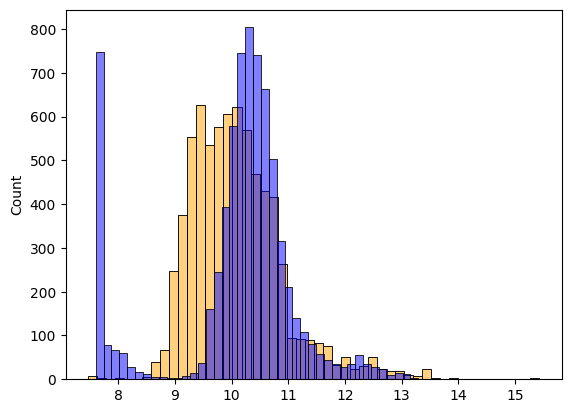

In [106]:
sns.histplot(y_train_pred, color="orange", alpha=0.5, bins=50)
sns.histplot(y_train, color="blue", alpha=0.5, bins=50)

## 2.8 RMSE

RMSE is an evaluation metric for assessing the performance of linear regression models.

$\text{RMSE} = \sqrt{\cfrac{1}{M}.\sum_{i=1}^{M}{(g(X_i) - y_i)^2}}$

In [107]:
def rmse(y, y_pred):
    error = y - y_pred 
    se = error**2 
    mse = se.mean()
    return np.sqrt(mse)

In [108]:
rmse(y_train_pred, y_train)

0.7582869942031669

## 2.8 Validating the Model

In [87]:
def prepare_X(df):
    df_num = df[base_features]
    df_num = df_num.fillna(0)
    X = df_num.values 
    return X

In [88]:
X_val = prepare_X(car_df_val)
y_val_pred = W0 + X_val.dot(W_full)
rmse(y_val, y_val_pred)

0.7229306760720366

## 2.11 Simple Feature Engineering 

This involves adding more features to the dataset to improve the quality of the model.

In [89]:
# Year 
2023 - car_df_train.year 

0       33
1        6
2       13
3        7
4       15
        ..
7145    22
7146    14
7147     8
7148    19
7149     8
Name: year, Length: 7150, dtype: int64

In [92]:
def prepare_X(df):
    df = df.copy()

    df["age"] = 2023 - df.year 
    features = base_features + ["age"]

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
     
    return X 

In [109]:
X_train = prepare_X(car_df_train)
W0, W_full = train_linear_regression(X_train, y_train)

In [113]:
X_val = prepare_X(car_df_val)
y_val_pred = W0 + X_val.dot(W_full)
rmse(y_val_pred, y_val)

0.5081272536579771

c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\machine-learning-zoomcamp-23-gSc8i9dl-py3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\machine-learning-zoomcamp-23-gSc8i9dl-py3.9\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\machine-learning-zoomcamp-23-gSc8i9dl-py3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='Count'>

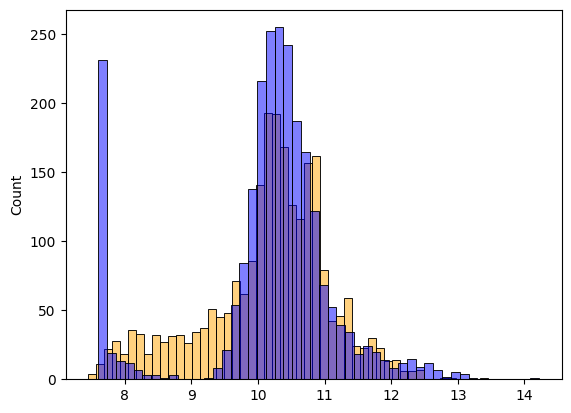

In [114]:
sns.histplot(y_val_pred, color="orange", alpha=0.5, bins=50)
sns.histplot(y_val, color="blue", alpha=0.5, bins=50)

## 2.11 Categorical Variables

In [115]:
car_df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,nissan,pulsar,1990,regular_unleaded,90.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,31,23,2009
1,audi,a3,2017,premium_unleaded_(recommended),220.0,4.0,automated_manual,all_wheel_drive,2.0,luxury,compact,convertible,34,25,3105
2,buick,lucerne,2010,flex-fuel_(unleaded/e85),227.0,6.0,automatic,front_wheel_drive,4.0,flex_fuel,large,sedan,26,17,155
3,toyota,corolla,2016,regular_unleaded,132.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,37,28,2031
4,chevrolet,trailblazer,2008,regular_unleaded,285.0,6.0,automatic,four_wheel_drive,4.0,NaN,midsize,4dr_suv,20,14,1385


In [116]:
car_df_train["number_of_doors"].value_counts()

number_of_doors
4.0    5033
2.0    1871
3.0     243
Name: count, dtype: int64

In [117]:
for i in [2, 3, 4]:
    car_df_train[f'num_doors_{i}'] = (car_df_train.number_of_doors == i).astype("int")

In [118]:
car_df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,nissan,pulsar,1990,regular_unleaded,90.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,31,23,2009,1,0,0
1,audi,a3,2017,premium_unleaded_(recommended),220.0,4.0,automated_manual,all_wheel_drive,2.0,luxury,compact,convertible,34,25,3105,1,0,0
2,buick,lucerne,2010,flex-fuel_(unleaded/e85),227.0,6.0,automatic,front_wheel_drive,4.0,flex_fuel,large,sedan,26,17,155,0,0,1
3,toyota,corolla,2016,regular_unleaded,132.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,37,28,2031,0,0,1
4,chevrolet,trailblazer,2008,regular_unleaded,285.0,6.0,automatic,four_wheel_drive,4.0,NaN,midsize,4dr_suv,20,14,1385,0,0,1


In [119]:
del car_df_train["num_doors_2"]
del car_df_train["num_doors_3"]
del car_df_train["num_doors_4"]

In [120]:
def prepare_X(df):
    df = df.copy()

    df["age"] = 2023 - df.year 
    features = base_features + ["age"]

    for i in [2, 3, 4]:
        df[f'num_doors_{i}'] = (car_df_train.number_of_doors == i).astype("int")
        features.append(f'num_doors_{i}')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
     
    return X 

In [121]:
X_train = prepare_X(car_df_train)
W0, W = train_linear_regression(X_train, y_train)

X_val = prepare_X(car_df_val)
y_pred_val = W0 + X_val.dot(W)

rmse(y_val, y_pred_val)

0.5091033276788136

In [127]:
car_df.make.nunique()

48

In [128]:
makes = list(car_df.make.value_counts().head().index)

In [131]:
def prepare_X(df):
    df = df.copy()

    df["age"] = 2023 - df.year 
    features = base_features + ["age"]

    for i in [2, 3, 4]:
        df[f'num_doors_{i}'] = (car_df_train.number_of_doors == i).astype("int")
        features.append(f'num_doors_{i}')

    for make in makes:
        df[f"make_{make}"] = (df.make == make).astype("int")
        features.append(f"make_{make}")

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
     
    return X 

In [132]:
X_train = prepare_X(car_df_train)
W0, W = train_linear_regression(X_train, y_train)

X_val = prepare_X(car_df_val)
y_pred_val = W0 + X_val.dot(W)

rmse(y_val, y_pred_val)

0.4982821757167034

In [133]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels',
    'market_category', 'vehicle_size', 'vehicle_style'
]

categories = {}

for c in categorical_variables:
    categories[c] = list(car_df[c].value_counts().head().index)

categories 

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [136]:
def prepare_X(df):
    df = df.copy()

    df["age"] = 2023 - df.year 
    features = base_features + ["age"]

    for i in [2, 3, 4]:
        df[f'num_doors_{i}'] = (car_df_train.number_of_doors == i).astype("int")
        features.append(f'num_doors_{i}')

    for k, values in categories.items():
        for v in values:
            df[f"k_{v}"] = (df[k] == v).astype("int")
            features.append(f"k_{v}")

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
     
    return X 

In [137]:
X_train = prepare_X(car_df_train)
W0, W = train_linear_regression(X_train, y_train)

X_val = prepare_X(car_df_val)
y_pred_val = W0 + X_val.dot(W)

rmse(y_val, y_pred_val)

117.70746165204325

## 2.13 Regularization

Regularization simply involves controlling the weights to prevent any form of numerical instability.

In [138]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5]
]

X = np.array(X)
X

array([[4, 4, 4],
       [3, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [4, 5, 5]])

In [139]:
XTX = X.T.dot(X)

In [141]:
XTX_inv = np.linalg.inv(XTX)

LinAlgError: Singular matrix

In [142]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.002]
]

X = np.array(X)
X

array([[4.   , 4.   , 4.   ],
       [3.   , 5.   , 5.   ],
       [5.   , 1.   , 1.   ],
       [5.   , 4.   , 4.   ],
       [7.   , 5.   , 5.   ],
       [4.   , 5.   , 5.002]])

In [144]:
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
XTX_inv 

array([[ 4.12729985e-02, -3.06270514e+01,  3.05818002e+01],
       [-3.06270514e+01,  3.48088577e+05, -3.48024865e+05],
       [ 3.05818002e+01, -3.48024865e+05,  3.47961215e+05]])

In [145]:
# Adding a small value to the diagonal of the GRAM matrix
XTX = XTX + 0.01 * np.eye(3)

In [146]:
np.linalg.inv(XTX)

array([[ 3.85593761e-02, -2.42061344e-02, -1.54206663e-02],
       [-2.42061344e-02,  5.00144561e+01, -4.99803215e+01],
       [-1.54206663e-02, -4.99803215e+01,  4.99961690e+01]])

In [147]:
def train_linear_regression_reg(X, y, r=0.001):
    """Train a linear regression model with regularization"""
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    w_0 = w[0]
    w_full = w[1:]

    return w_0, w_full 

In [148]:
X_train = prepare_X(car_df_train)
W0, W = train_linear_regression_reg(X_train, y_train)

X_val = prepare_X(car_df_val)
y_pred_val = W0 + X_val.dot(W)

rmse(y_val, y_pred_val)

0.4580850484281623

## 2.13 Tuning the Model

In [159]:
# Iterative over a non-exhaustive list of values
best_score = np.inf
best_r = 0 
for r in [0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(car_df_train)
    W0, W = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(car_df_val)
    y_val_pred = W0 + X_val.dot(W)
    val_rmse_score = rmse(y_val, y_val_pred)

    print(f"For r={r}: RMSE score = {val_rmse_score}")

    if val_rmse_score < best_score:
        best_score = val_rmse_score 
        best_r = r

print("------")
print(f"Best r = {best_r} with score {best_score}")

For r=0: RMSE score = 117.70746165204325
For r=1e-05: RMSE score = 0.45808511302093247
For r=0.0001: RMSE score = 0.4580850862932481
For r=0.001: RMSE score = 0.4580850484281623
For r=0.1: RMSE score = 0.4580924298952784
For r=1: RMSE score = 0.45868187669043603
For r=10: RMSE score = 0.4739109568544036
------
Best r = 0.001 with score 0.4580850484281623


## 2.14 Using the Model

In [161]:
car_df_full_train = pd.concat([car_df_train, car_df_val])
print(car_df_full_train.shape)
car_df_full_train.head()

(9532, 15)


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,nissan,pulsar,1990,regular_unleaded,90.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,31,23,2009
1,audi,a3,2017,premium_unleaded_(recommended),220.0,4.0,automated_manual,all_wheel_drive,2.0,luxury,compact,convertible,34,25,3105
2,buick,lucerne,2010,flex-fuel_(unleaded/e85),227.0,6.0,automatic,front_wheel_drive,4.0,flex_fuel,large,sedan,26,17,155
3,toyota,corolla,2016,regular_unleaded,132.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,37,28,2031
4,chevrolet,trailblazer,2008,regular_unleaded,285.0,6.0,automatic,four_wheel_drive,4.0,NaN,midsize,4dr_suv,20,14,1385


In [162]:
car_df_full_train = car_df_full_train.reset_index(drop=True)

In [163]:
X_full_train = prepare_X(car_df_full_train)
X_full_train 

array([[ 90.,   4.,  31., ...,   1.,   0.,   0.],
       [220.,   4.,  34., ...,   0.,   1.,   0.],
       [227.,   6.,  26., ...,   0.,   0.,   0.],
       ...,
       [134.,   4.,  40., ...,   0.,   0.,   0.],
       [141.,   4.,  35., ...,   0.,   0.,   0.],
       [190.,   6.,  18., ...,   0.,   0.,   0.]])

In [164]:
y_full_train = np.concatenate([y_train, y_val])

In [165]:
W0, W = train_linear_regression_reg(X_full_train, y_full_train, r=best_r)

In [167]:
X_test = prepare_X(car_df_test)
y_test_pred = W0 + X_test.dot(W)
rmse(y_test, y_test_pred)

0.4677296114067603

In [168]:
test_car_sample = car_df_test.iloc[20].to_dict()
test_car_sample 

{'make': 'nissan',
 'model': 'maxima',
 'year': 2016,
 'engine_fuel_type': 'premium_unleaded_(recommended)',
 'engine_hp': 300.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'high-performance',
 'vehicle_size': 'midsize',
 'vehicle_style': 'sedan',
 'highway_mpg': 30,
 'city_mpg': 22,
 'popularity': 2009}

In [169]:
test_car_sample_df = pd.DataFrame([test_car_sample])
test_car_sample_df 

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,nissan,maxima,2016,premium_unleaded_(recommended),300.0,6.0,automatic,front_wheel_drive,4.0,high-performance,midsize,sedan,30,22,2009


In [170]:
X_test_sample = prepare_X(test_car_sample_df)
y_test_sample_pred = W0 + X_test_sample.dot(W)
y_test_sample_pred 

array([10.71037589])

In [171]:
# Get the exponential - 1 to remove the logarithm 
np.expm1(y_test_sample_pred)

array([44817.48250166])

In [174]:
np.expm1(y_test[20])

34489.99999999997